<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

#  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [1]:
import pandas as pd
from glob import glob
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
import plotly.graph_objects as go


In [2]:
working_dir = 'Archivos/'
working_dir = 'C:/Users/user/OneDrive - Ministerio de Agricultura y Desarrollo Rural/Documentos/GitHub/MIIA_estudiante_25/Laboratorios/Archivos'
files = glob(working_dir+'/*2019*.txt')+glob(working_dir+'/*2020*.txt')

In [3]:
files

['C:/Users/user/OneDrive - Ministerio de Agricultura y Desarrollo Rural/Documentos/GitHub/MIIA_estudiante_25/Laboratorios/Archivos\\SB11_20191.TXT',
 'C:/Users/user/OneDrive - Ministerio de Agricultura y Desarrollo Rural/Documentos/GitHub/MIIA_estudiante_25/Laboratorios/Archivos\\SB11_20192.TXT',
 'C:/Users/user/OneDrive - Ministerio de Agricultura y Desarrollo Rural/Documentos/GitHub/MIIA_estudiante_25/Laboratorios/Archivos\\SB11_20201.txt',
 'C:/Users/user/OneDrive - Ministerio de Agricultura y Desarrollo Rural/Documentos/GitHub/MIIA_estudiante_25/Laboratorios/Archivos\\SB11_20202.txt']

In [4]:
def merge_periodos(list_paths,sep):
    resumen_df = {}
    if sep=='|':
        list_df_comp = [pd.read_csv(df,sep=sep, error_bad_lines=False,encoding='latin-1') for df in list_paths]
    else:
        list_df_comp = [pd.read_csv(df,sep=sep, error_bad_lines=False) for df in list_paths]
    
    ####Se crea una columna por dataframe para saber a que año pertenece cada uno
    for i,y in zip(list_df_comp,list_paths):
        numerical = len(i.select_dtypes(include=[np.number]).columns)
        categorical = len(i.select_dtypes(exclude=[np.number]).columns)###Revisar esta parte
        resumen_df[y[-9:-4]]=i.shape,numerical,categorical###filas,col,varnum,varcat
        i['ANIO']=int(y[-9:-4])
        
    resumen_df = pd.DataFrame(resumen_df).transpose()
    resumen_df['registros'],resumen_df['variables'] = zip(*resumen_df[0])
    
    resumen_df.columns = ['shape','numerical','categorical','registros','variables']
    resumen_df.drop(['shape'],axis=1,inplace=True)
    resumen_df.sort_index(inplace=True)
        
    
    ####Se obtienen todas las columnas por dataframe(varialbes)
    variables = [column.columns for column in list_df_comp]

    ####Se define el subconjunto de variables, para eso se toman las variables que estan en todos los anios
    variables_inter = set(variables[0]).intersection(*variables[1:])
    variables_inter = list(variables_inter)
    

    df_inter = [data_periodo[variables_inter] for data_periodo in list_df_comp]
    
    #df_concat = pd.concat(list_df_comp)
    #return df_concat
    return list_df_comp,variables_inter,resumen_df,df_inter###df_completos,##var intersec,resumen,df_var_comunes

In [5]:
data_p3, variables_inter_p3, resumen_p3, df_inter_3 = merge_periodos(files,'¬')

In [6]:
anios_interes = pd.concat(df_inter_3)
anios_interes.to_csv('data/resumen_anios_2019_2020.csv',index=False,sep=';')

In [7]:
anios_interes.shape

(1087602, 82)

In [8]:
anios_interes.isnull().sum().to_frame()[0].unique()

array([   102,      0,  49136,    208,  40339,  32527,  31504,  46724,
        38114,   1160,  37413,  36533,  56817,  36522,  37027,    389,
        50784,  46411,  39440,    115,  36142,  50509,  47540,  37930,
         4151,  35284,  50317,  35288,  53496,  54438,  62020, 177170,
           55,  38264,  33376], dtype=int64)

In [9]:
anios_interes['COLE_BILINGUE'].isnull().sum()

177170

In [10]:
anios_interes.isnull().sum().to_frame()[0].unique()

array([   102,      0,  49136,    208,  40339,  32527,  31504,  46724,
        38114,   1160,  37413,  36533,  56817,  36522,  37027,    389,
        50784,  46411,  39440,    115,  36142,  50509,  47540,  37930,
         4151,  35284,  50317,  35288,  53496,  54438,  62020, 177170,
           55,  38264,  33376], dtype=int64)

In [11]:
62020/len(anios_interes)*100

5.702453654921561

In [12]:
anios_interes_no_nan = anios_interes.dropna()
anios_interes_no_nan.shape

(785959, 82)

In [13]:
100-(785959/len(anios_interes)*100)

27.734686034045538

***Respuestas a primer punto***

¿Qué dimensiones tienen los datos?


R/ Para el periodo tres la dimensión de los datos varia ampliamente, tal como se puede observar en la siguiente celda, pero luego de sustraer solo las variables que son comunes para todos los periodos se obtiene que las dimensiones son de **1087602 x  82**. Para esto se puede ver el csv **"resumen_anios_2019_2020.csv"**

**¿Con cuántos años y periodos de evaluación se cuenta?**

R/ Se cuenta con un **total de 2 años**, con un total de 4 periodos

**¿Cuáles variables pueden ser de interés para la problemática planteada?**

R/Las variables de departamento de residencia, estrato, acceso a internet y educación de padre y madre se tomaron como las variables de interes para la problematica

**¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?**


R/Se encuentra que para cada variable del dataframe la cantidad de datos faltantes varia, el valor maximo es de 16,28% para una unica columna/feature ("Colegio Bilingüe"), para los demas casos no supera el 5,7%. Al retirar todos los valores nulos del conjunto de datos se pierden cerca del 27,73% del total de los datos, para efectos del ejercicio no representa un impedimento para realizar el análisis de los datos.

# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

In [20]:
import seaborn as sns

In [21]:
datos_grupo_3 = pd.read_csv('data/resumen_anios_2019_2020.csv',sep=';')
datos_no_nan = datos_grupo_3.dropna()

In [22]:
var_interes = ["ESTU_DEPTO_RESIDE","FAMI_ESTRATOVIVIENDA","FAMI_EDUCACIONMADRE","FAMI_EDUCACIONPADRE"]
internet = ["FAMI_TIENEINTERNET"]
lavadora = ["FAMI_TIENELAVADORA"] 
jornada = ["COLE_JORNADA"]

In [23]:
puntajes_internet = datos_no_nan.groupby(["FAMI_ESTRATOVIVIENDA","ESTU_DEPTO_RESIDE"]+internet)["PUNT_SOCIALES_CIUDADANAS","PUNT_MATEMATICAS","PUNT_INGLES",
                                                          "PUNT_LECTURA_CRITICA","PUNT_C_NATURALES","PUNT_GLOBAL"].mean()
puntajes_lavadora = datos_no_nan.groupby(["FAMI_ESTRATOVIVIENDA","ESTU_DEPTO_RESIDE"]+lavadora)["PUNT_SOCIALES_CIUDADANAS","PUNT_MATEMATICAS","PUNT_INGLES",
                                                          "PUNT_LECTURA_CRITICA","PUNT_C_NATURALES","PUNT_GLOBAL"].mean()
puntajes_jornada = datos_no_nan.groupby(["FAMI_ESTRATOVIVIENDA","ESTU_DEPTO_RESIDE"]+jornada)["PUNT_SOCIALES_CIUDADANAS","PUNT_MATEMATICAS","PUNT_INGLES",
                                                          "PUNT_LECTURA_CRITICA","PUNT_C_NATURALES","PUNT_GLOBAL"].mean()

puntajes_internet = puntajes_internet.reset_index()
puntajes_lavadora = puntajes_lavadora.reset_index()
puntajes_jornada = puntajes_jornada.reset_index()

puntajes_internet.to_csv('data/puntajes_internet.csv',sep=';')
puntajes_lavadora.to_csv('data/puntajes_lavadora.csv',sep=';')
puntajes_jornada.to_csv('data/puntajes_jornada.csv',sep=';')

In [24]:
import plotly.express as px
fig = px.box(puntajes_internet, x="FAMI_ESTRATOVIVIENDA", y="PUNT_GLOBAL")
fig.update_layout(title_text="Relación estratos vivienda vs puntaje global ICFES")
fig.show()

Text(0.5, 1.08, 'Tenencia de lavadora vs valor puntaje por manteria')

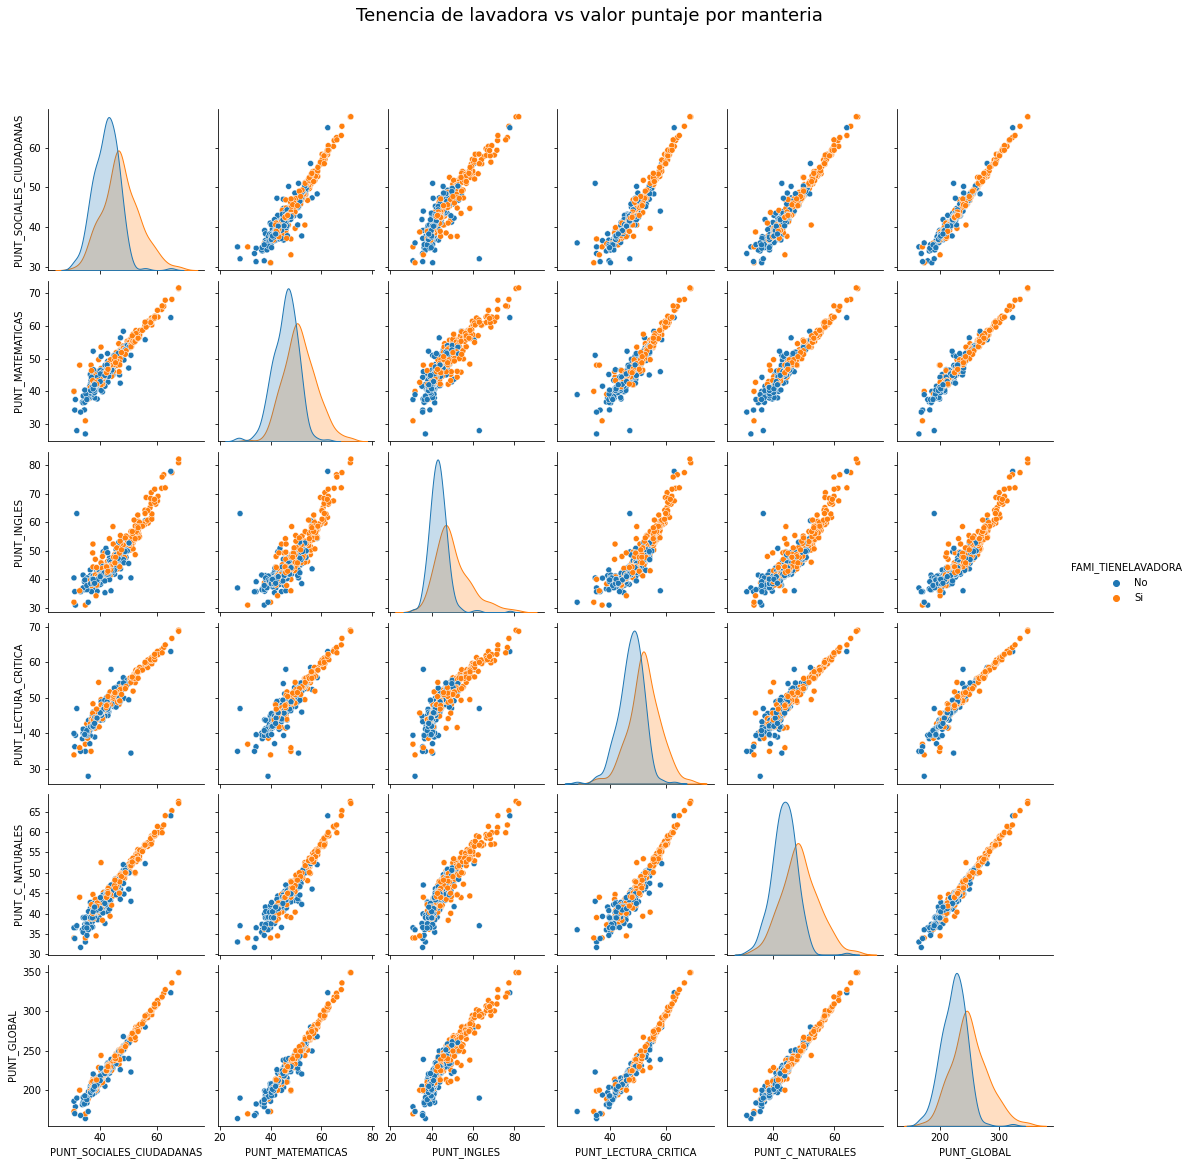

In [25]:
lavadora_plot = sns.pairplot(puntajes_lavadora, hue="FAMI_TIENELAVADORA")
lavadora_plot.fig.suptitle("Tenencia de lavadora vs valor puntaje por manteria", y=1.08,fontsize=18)

Text(0.5, 1.08, 'Jornada colegio vs valor puntaje por manteria')

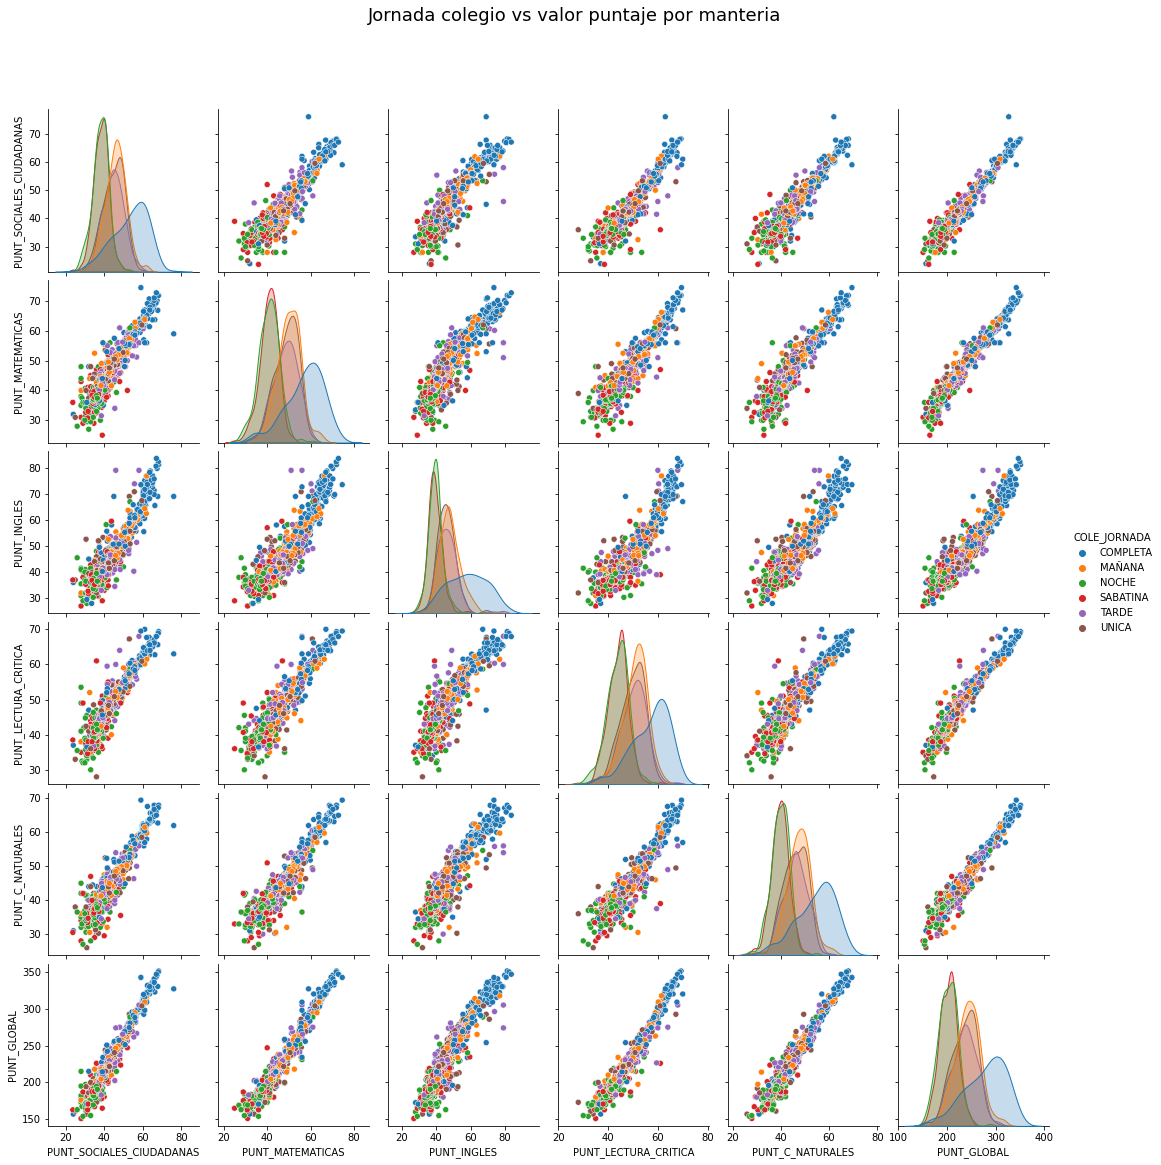

In [26]:
jornada_plot = sns.pairplot(puntajes_jornada, hue="COLE_JORNADA")
jornada_plot.fig.suptitle("Jornada colegio vs valor puntaje por manteria", y=1.08,fontsize=18)

Text(0.5, 1.08, 'Acceso a internet vs valor puntaje por materia')

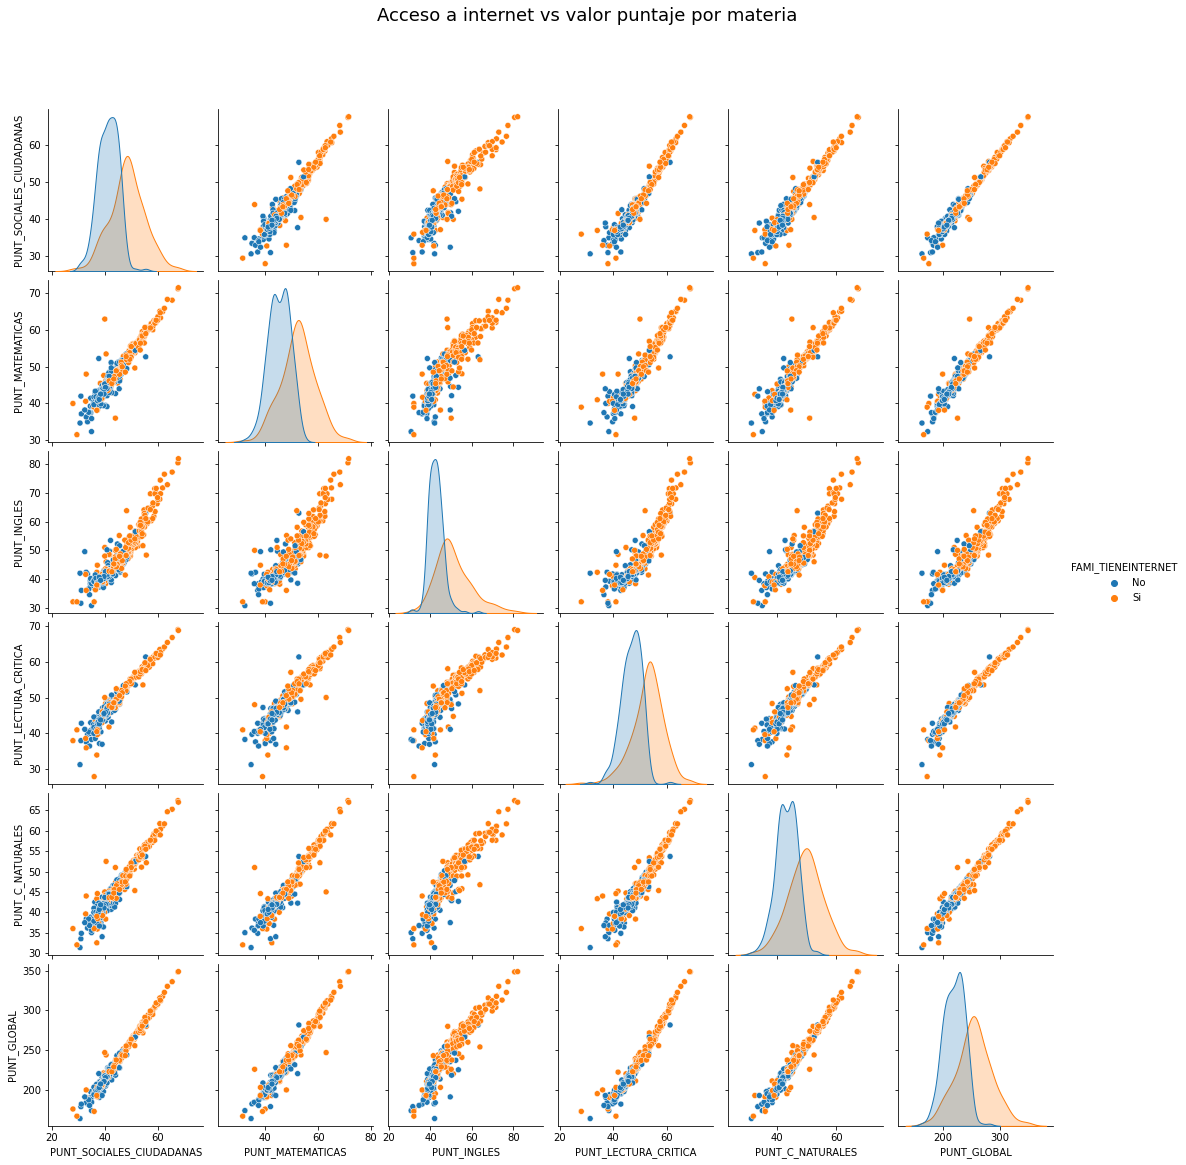

In [27]:
internet_plot = sns.pairplot(puntajes_internet, hue="FAMI_TIENEINTERNET")
internet_plot.fig.suptitle("Acceso a internet vs valor puntaje por materia", y=1.08,fontsize=18)

In [28]:
fig = px.bar(puntajes_jornada, x="COLE_JORNADA", y="PUNT_GLOBAL", color="COLE_JORNADA",
                 )
fig.update_layout(
    title="Puntaje Global",
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=10,
    )
)
fig.show()

**¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?**

R/Se observa que los estratos 5 y 6 tienen puntajes globales mas altos en relación con los demás estratos socioeconomicos, también se observa que a medida que aumenta el estrato también la agrupación de los datos es mayor, se podría señalar que en los mayores estratos los estudiantes tienen una mayor variedad en los puntajes, entre 277 y 196, pero en los estratos más bajos los puntajes vairan menos y estan más cerca a valores bajos. Por otro lado, también se evidencia que la jornada "SABATINA" es la que peor puntaje global tiene, mientras que la jornada completa tiene los puntajes más altos, por lo que la jornada en la que se estudia si influye en la calificación final.

**¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?**

R/Se puede observar que hay un impacto entre el acceso a internet y la obtención de puntajes más altos, al igual que el estrato socioeoconomico influye en las calificaciones obtenidas. También se puede observar que los electrodomesticos afectan los puntajes obtenidos, como se puede observar en la grafica que muestra la relación entre el acceso a la lavadora y los puntajes en las diferentes materias de los estudiantes.

**¿Sobre cuáles variables vale la pena hacer un análisis más profundo?**

R/ Las variables elegidas para realizar un análisis más profundos son el departamento, el acceso a internet, educación de los padres, estrato socioeconómico y si la familia tiene lavadora 

***Identifique las tres preguntas analíticas que plantearía con mayor prioridad***

pregunta_analytics = '''Con el uso de programación básica de Phyton 

¿Cual seria el modelo que permita identificar si la variables sociodemograficas tienen influencia en la obtención del puntaje global de un estudiante?

¿Influyen las caracteristicas sociodemográficas  en la obtención del puntaje final de la prueba ICFES?

¿Qué caracteristicas sociodemográficas tienen mayor influencia en la obtención del puntaje final de un estudiante que presenta el ICFES?'''

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

In [29]:
# Código
var_interes = ["ESTU_DEPTO_RESIDE","FAMI_ESTRATOVIVIENDA","FAMI_EDUCACIONMADRE",
               "FAMI_EDUCACIONPADRE","FAMI_TIENEINTERNET","FAMI_TIENELAVADORA","COLE_JORNADA",
              "PUNT_SOCIALES_CIUDADANAS","PUNT_MATEMATICAS","PUNT_INGLES","PUNT_LECTURA_CRITICA",
               "PUNT_C_NATURALES","PUNT_GLOBAL"]

In [30]:
estratos={'Estrato 1':1,'Estrato 2':2,'Estrato 3':3,'Estrato 4':4,'Estrato 5':5,'Estrato 6':6,'Sin Estrato':0}
educacion={'Ninguno':0,'No sabe':0,'No Aplica':1,'Primaria incompleta':1, 'Primaria completa':2,
            'Secundaria (Bachillerato) incompleta':3,'Secundaria (Bachillerato) completa':4,
            'Técnica o tecnológica incompleta':5,'Técnica o tecnológica completa':6,
            'Educación profesional incompleta':7,'Educación profesional completa':8,'Postgrado':9}
si_no={'Si':1,'No':0}

In [35]:
df_predict = datos_no_nan[var_interes]
df_predict.replace({"FAMI_ESTRATOVIVIENDA": estratos},inplace=True)
df_predict.replace({"FAMI_EDUCACIONMADRE": educacion},inplace=True)
df_predict.replace({"FAMI_EDUCACIONPADRE": educacion},inplace=True)
df_predict.replace({"FAMI_TIENELAVADORA": si_no},inplace=True)
df_predict.replace({"FAMI_TIENEINTERNET": si_no},inplace=True)
df_predict

ESTU_DEPTO_RESIDE  FAMI_ESTRATOVIVIENDA  FAMI_EDUCACIONMADRE  \
0                   VALLE                     4                    4   
1                   VALLE                     3                    4   
2                   VALLE                     2                    8   
3                   VALLE                     2                    8   
4                  BOGOTA                     6                    8   
...                   ...                   ...                  ...   
1087533            BOGOTÁ                     3                    4   
1087534            TOLIMA                     2                    3   
1087535             VALLE                     3                    5   
1087537             VALLE                     2                    4   
1087539            BOGOTÁ                     2                    8   

         FAMI_EDUCACIONPADRE  FAMI_TIENEINTERNET  FAMI_TIENELAVADORA  \
0                          5                   1                   1   
1                          6                   1                   1   
2                          1                   1                   1   
3                          8                   1                   0   
4                          8                   1                   1   
...                      ...                 ...                 ...   
1087533                    0                   1                   1   
1087534                    2                   1                   0   
1087535                    1                   1                   0   
1087537                    4                   1                   1   
1087539                    1                   1                   1   

        COLE_JORNADA  PUNT_SOCIALES_CIUDADANAS  PUNT_MATEMATICAS  PUNT_INGLES  \
0              NOCHE                        40                49         54.0   
1              NOCHE                        34                45         35.0   
2              NOCHE                        41                52         49.0   
3              NOCHE                        44                54         64.0   
4           COMPLETA                        47                67         71.0   
...              ...                       ...               ...          ...   
1087533       MAÑANA                        34                34         42.0   
1087534       MAÑANA                        61                53         51.0   
1087535       MAÑANA                        33                44         51.0   
1087537       MAÑANA                        40                52         44.0   
1087539        UNICA                        65                61         59.0   

         PUNT_LECTURA_CRITICA  PUNT_C_NATURALES  PUNT_GLOBAL  
0                          50                47          235  
1                          53                44          217  
2                          60                44          246  
3                          56                46          255  
4                          55                50          280  
...                       ...               ...          ...  
1087533                    36                30          171  
1087534                    53                59          280  
1087535                    47                48          218  
1087537                    51                36          223  
1087539                    65                61          313  

[785959 rows x 13 columns]

In [36]:
datos_sample = df_predict.sample(frac = 0.5)
datos_sample

ESTU_DEPTO_RESIDE  FAMI_ESTRATOVIVIENDA  FAMI_EDUCACIONMADRE  \
505745            CORDOBA                     2                    4   
1055206         ATLANTICO                     1                    8   
65501               CESAR                     2                    3   
854228              VALLE                     2                    1   
672871    NORTE SANTANDER                     2                    5   
...                   ...                   ...                  ...   
983706          ANTIOQUIA                     0                    1   
737684              VALLE                     1                    3   
170441              CHOCO                     3                    1   
510843          ATLANTICO                     0                    4   
819540             NARIÑO                     2                    3   

         FAMI_EDUCACIONPADRE  FAMI_TIENEINTERNET  FAMI_TIENELAVADORA  \
505745                     3                   0                   1   
1055206                    5                   0                   0   
65501                      6                   1                   1   
854228                     3                   0                   0   
672871                     3                   1                   0   
...                      ...                 ...                 ...   
983706                     0                   0                   1   
737684                     4                   1                   1   
170441                     0                   1                   1   
510843                     4                   0                   1   
819540                     2                   1                   1   

        COLE_JORNADA  PUNT_SOCIALES_CIUDADANAS  PUNT_MATEMATICAS  PUNT_INGLES  \
505745        MAÑANA                        38                34         48.0   
1055206        UNICA                        58                70         49.0   
65501          UNICA                        41                50         41.0   
854228        MAÑANA                        47                42         46.0   
672871        MAÑANA                        51                56         51.0   
...              ...                       ...               ...          ...   
983706      COMPLETA                        33                36         38.0   
737684        MAÑANA                        71                56         53.0   
170441      SABATINA                        39                43         36.0   
510843         TARDE                        37                45         47.0   
819540         TARDE                        58                64         42.0   

         PUNT_LECTURA_CRITICA  PUNT_C_NATURALES  PUNT_GLOBAL  
505745                     49                41          205  
1055206                    54                57          295  
65501                      38                42          213  
854228                     50                45          230  
672871                     55                51          265  
...                       ...               ...          ...  
983706                     33                33          170  
737684                     63                66          316  
170441                     31                25          173  
510843                     43                43          212  
819540                     61                47          282  

[392980 rows x 13 columns]

In [37]:
x_data=datos_sample[["FAMI_ESTRATOVIVIENDA","FAMI_EDUCACIONMADRE","FAMI_EDUCACIONPADRE","FAMI_TIENELAVADORA","FAMI_TIENEINTERNET"]]#
y_data=datos_sample["PUNT_GLOBAL"]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [39]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [46]:
model.predict([[1,1,2,1,0],[5,1,2,1,0]])

array([283, 348], dtype=int64)

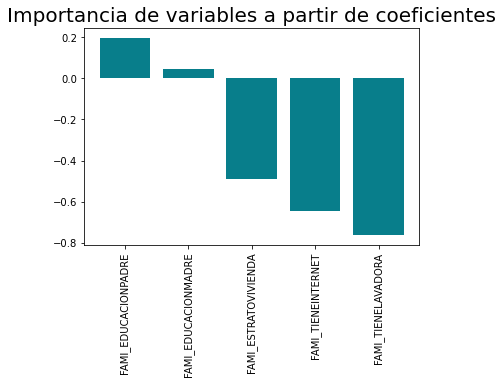

In [47]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Importancia de variables a partir de coeficientes', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [48]:
model.score(X_test, y_test)

0.0011603643951346124

**Observaciones modelo: Se eligieron el 50% de los datos de forma aleatoria para que el modelo corriera más rápido,  con las cinco variables de interes elegidas anteriormente.

La variable más influyente en la obtención del puntaje gobal es el acceso a internet de las familias seguido del estrato del estudiante.**

El rendimiento de modelo elegido es del 0,116%, es bastante bajo. De igual forma, se debe considerar que se tomaron solo 5 variables del total de las 82 variables del espacio muestral y se borraron los datos nulos de la base inicial. Se esperaria que a medida que aumenten la cantidad de variables aumente el rendimiento del modelo para predecir el puntaje obtenido de acuerdo a las variables sociodemograficas consideradas.

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

**Generar código para los archivos csv de este punto**

In [49]:
import panel as pn
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd

In [50]:
pn.extension('plotly')

In [51]:
colors = {'mama':'#9B349E','papa':'#34389E'}

In [52]:
var_interes = ["ESTU_DEPTO_RESIDE","FAMI_ESTRATOVIVIENDA","FAMI_EDUCACIONMADRE",
               "FAMI_EDUCACIONPADRE","FAMI_TIENEINTERNET","FAMI_TIENELAVADORA","COLE_JORNADA",
              "PUNT_SOCIALES_CIUDADANAS","PUNT_MATEMATICAS","PUNT_INGLES","PUNT_LECTURA_CRITICA",
               "PUNT_C_NATURALES","PUNT_GLOBAL","ANIO"]

In [53]:
estudios_orden=['Ninguno','Primaria incompleta', 'Primaria completa',
 'Secundaria (Bachillerato) incompleta','Secundaria (Bachillerato) completa',
 'Técnica o tecnológica incompleta','Técnica o tecnológica completa',
 'Educación profesional incompleta','Educación profesional completa','Postgrado', 'No sabe','No Aplica']

In [54]:
new_names = {'PUNT_GLOBAL':'Global','PADRE':'Padre','FAMI_EDUCACION':'Educacion familia',
'PUNT_MATEMATICAS':'Matematicas','PUNT_INGLES':'Ingles','PUNT_LECTURA_CRITICA':'Lectura Critica',
'PUNT_C_NATURALES':'Naturales','PUNT_SOCIALES_CIUDADANAS':'Sociales'}

In [56]:
var_interes

['ESTU_DEPTO_RESIDE',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_EDUCACIONMADRE',
 'FAMI_EDUCACIONPADRE',
 'FAMI_TIENEINTERNET',
 'FAMI_TIENELAVADORA',
 'COLE_JORNADA',
 'PUNT_SOCIALES_CIUDADANAS',
 'PUNT_MATEMATICAS',
 'PUNT_INGLES',
 'PUNT_LECTURA_CRITICA',
 'PUNT_C_NATURALES',
 'PUNT_GLOBAL',
 'ANIO']

In [57]:
datos_no_nan

ESTU_NSE_ESTABLECIMIENTO  PERCENTIL_MATEMATICAS  \
0                             3.0                     31   
1                             3.0                     25   
2                             3.0                     38   
3                             3.0                     43   
4                             4.0                     73   
...                           ...                    ...   
1087533                       3.0                      7   
1087534                       2.0                     58   
1087535                       2.0                     29   
1087537                       3.0                     54   
1087539                       3.0                     81   

        ESTU_DEDICACIONLECTURADIARIA ESTU_MCPIO_PRESENTACION  \
0                  Entre 1 y 2 horas                    CALI   
1         No leo por entretenimiento                    CALI   
2         No leo por entretenimiento                    CALI   
3         No leo por entretenimiento                    CALI   
4                  Entre 1 y 2 horas             BOGOTÁ D.C.   
...                              ...                     ...   
1087533            Entre 1 y 2 horas             BOGOTÁ D.C.   
1087534   No leo por entretenimiento                  IBAGUÉ   
1087535           30 minutos o menos              CAICEDONIA   
1087537        Entre 30 y 60 minutos                    CALI   
1087539           30 minutos o menos             BOGOTÁ D.C.   

                                    FAMI_TRABAJOLABORPADRE  \
0        Trabaja como profesional (por ejemplo médico, ...   
1        Trabaja por cuenta propia (por ejemplo plomero...   
2        Es dueño de un negocio pequeño (tiene pocos em...   
3        Trabaja como profesional (por ejemplo médico, ...   
4        Trabaja como profesional (por ejemplo médico, ...   
...                                                    ...   
1087533                                            No sabe   
1087534  Trabaja como personal de limpieza, mantenimien...   
1087535  Es dueño de un negocio pequeño (tiene pocos em...   
1087537       Es vendedor o trabaja en atención al público   
1087539  Es dueño de un negocio pequeño (tiene pocos em...   

        ESTU_DEPTO_PRESENTACION  ESTU_NSE_INDIVIDUAL  ESTU_CONSECUTIVO  \
0                         VALLE                  3.0  SB11201910008548   
1                         VALLE                  2.0  SB11201910004475   
2                         VALLE                  2.0  SB11201910011427   
3                         VALLE                  3.0  SB11201910041975   
4                        BOGOTA                  4.0  SB11201910014490   
...                         ...                  ...               ...   
1087533                  BOGOTÁ                  3.0  SB11202040136015   
1087534                  TOLIMA                  2.0  SB11202040205050   
1087535                   VALLE                  2.0  SB11202040305097   
1087537                   VALLE                  3.0  SB11202040332735   
1087539                  BOGOTÁ                  3.0  SB11202040338804   

             COLE_CARACTER                   FAMI_EDUCACIONMADRE  ...  \
0        TÉCNICO/ACADÉMICO    Secundaria (Bachillerato) completa  ...   
1        TÉCNICO/ACADÉMICO    Secundaria (Bachillerato) completa  ...   
2        TÉCNICO/ACADÉMICO        Educación profesional completa  ...   
3        TÉCNICO/ACADÉMICO        Educación profesional completa  ...   
4                ACADÉMICO        Educación profesional completa  ...   
...                    ...                                   ...  ...   
1087533          ACADÉMICO    Secundaria (Bachillerato) completa  ...   
1087534  TÉCNICO/ACADÉMICO  Secundaria (Bachillerato) incompleta  ...   
1087535  TÉCNICO/ACADÉMICO      Técnica o tecnológica incompleta  ...   
1087537            TÉCNICO    Secundaria (Bachillerato) completa  ...   
1087539  TÉCNICO/ACADÉMICO        Educación profesional completa  ...   

        

In [58]:
datos_grupo_3

ESTU_NSE_ESTABLECIMIENTO  PERCENTIL_MATEMATICAS  \
0                             3.0                     31   
1                             3.0                     25   
2                             3.0                     38   
3                             3.0                     43   
4                             4.0                     73   
...                           ...                    ...   
1087597                       3.0                     17   
1087598                       2.0                     25   
1087599                       2.0                     11   
1087600                       2.0                      4   
1087601                       2.0                     56   

        ESTU_DEDICACIONLECTURADIARIA ESTU_MCPIO_PRESENTACION  \
0                  Entre 1 y 2 horas                    CALI   
1         No leo por entretenimiento                    CALI   
2         No leo por entretenimiento                    CALI   
3         No leo por entretenimiento                    CALI   
4                  Entre 1 y 2 horas             BOGOTÁ D.C.   
...                              ...                     ...   
1087597           30 minutos o menos             BOGOTÁ D.C.   
1087598   No leo por entretenimiento                   YOPAL   
1087599           30 minutos o menos                   YOPAL   
1087600           30 minutos o menos           PUERTO GAITÁN   
1087601           30 minutos o menos                   YOPAL   

                                    FAMI_TRABAJOLABORPADRE  \
0        Trabaja como profesional (por ejemplo médico, ...   
1        Trabaja por cuenta propia (por ejemplo plomero...   
2        Es dueño de un negocio pequeño (tiene pocos em...   
3        Trabaja como profesional (por ejemplo médico, ...   
4        Trabaja como profesional (por ejemplo médico, ...   
...                                                    ...   
1087597  Es operario de máquinas o conduce vehículos (t...   
1087598  Trabaja por cuenta propia (por ejemplo plomero...   
1087599  Trabaja por cuenta propia (por ejemplo plomero...   
1087600       Es vendedor o trabaja en atención al público   
1087601  Trabaja por cuenta propia (por ejemplo plomero...   

        ESTU_DEPTO_PRESENTACION  ESTU_NSE_INDIVIDUAL  ESTU_CONSECUTIVO  \
0                         VALLE                  3.0  SB11201910008548   
1                         VALLE                  2.0  SB11201910004475   
2                         VALLE                  2.0  SB11201910011427   
3                         VALLE                  3.0  SB11201910041975   
4                        BOGOTA                  4.0  SB11201910014490   
...                         ...                  ...               ...   
1087597                  BOGOTÁ                  3.0  SB11202040573629   
1087598                CASANARE                  1.0  SB11202040573636   
1087599                CASANARE                  2.0  SB11202040573651   
1087600                    META                  2.0  SB11202040573662   
1087601                CASANARE                  2.0  SB11202040573664   

             COLE_CARACTER                 FAMI_EDUCACIONMADRE  ...  \
0        TÉCNICO/ACADÉMICO  Secundaria (Bachillerato) completa  ...   
1        TÉCNICO/ACADÉMICO  Secundaria (Bachillerato) completa  ...   
2        TÉCNICO/ACADÉMICO      Educación profesional completa  ...   
3        TÉCNICO/ACADÉMICO      Educación profesional completa  ...   
4                ACADÉMICO      Educación profesional completa  ...   
...                    ...                                 ...  ...   
1087597                NaN      Educación profesional completa  ...   
1087598          ACADÉMICO  Secundaria (Bachillerato) completa  ...   
1087599          ACADÉMICO                 Primaria incompleta  ...   
1087600                NaN                   Primaria completa  ...   
1087601          ACADÉMICO                 Primaria incompleta  ...   

        PERCENTIL_GLOBAL  ESTU_E

**Ajuste de datos, se generarn varios archivos csv**

In [72]:
datos_grupo_3 = pd.read_csv('data/resumen_anios_2019_2020.csv',sep=';')
datos_no_nan = datos_grupo_3.dropna()
datos_no_nan = datos_no_nan[var_interes]
resumen_anios = datos_no_nan.groupby('ANIO').agg(['mean','min','max','count'])
resumen_anios.columns = resumen_anios.columns.droplevel(0)
resumen_anios.to_csv('data/resumen_anios_2019_2020.csv',sep=';')

In [73]:
datos_no_nan.groupby(['ANIO','ESTU_DEPTO_RESIDE'])['PUNT_MATEMATICAS','PUNT_INGLES','PUNT_LECTURA_CRITICA',
                                                   'PUNT_C_NATURALES','PUNT_GLOBAL'].mean().to_csv('data/departamentos_map.csv',sep=';')
general_deptos=datos_no_nan.groupby(['ESTU_DEPTO_RESIDE'])['PUNT_MATEMATICAS','PUNT_INGLES','PUNT_LECTURA_CRITICA',
                                                   'PUNT_C_NATURALES','PUNT_GLOBAL'].mean()
general_deptos['ANIO']='Todos'
general_deptos.reset_index(inplace=True)
deptos = pd.read_csv('data/departamentos_map.csv',sep=';')
pd.concat([deptos,general_deptos]).to_csv('data/departamentos_map.csv',sep=';',index=False)

In [74]:
def resumen_p3(path):
    resumen_p3 = pd.read_csv(path,sep=';')
    resumen_p3.set_index('ANIO',inplace=True)
    return resumen_p3
df = resumen_p3('data/resumen_puntajes_p3.csv')

In [75]:
def opciones_periodos(df):
    opciones = df.index.to_list()
    opciones.insert(0,'Todos')
    periodos = pn.widgets.Select(name='Seleccione un periodo', options=opciones)
    return periodos
periodo_select=opciones_periodos(df)

In [76]:
def materias_opciones():
    opciones = ['Global','Matematicas','Ingles','Lectura Critica','Naturales','Sociales']
    materias = pn.widgets.Select(name='Seleccione una materia', options=opciones)
    return materias
materias_options = materias_opciones()

In [77]:
@pn.depends(materias_options.param.value,periodo_select.param.value)
def summary_puntaje(valor,periodo):
    print(periodo)
    print(valor)
    df_notas=df
    materia =valor
    materias={'Global':'.5','Matematicas':'.1','Ingles':'.2','Lectura Critica':'.3','Naturales':'.4','Sociales':''}
    
    if periodo!='Todos':
        df_notas=df_notas.loc[periodo]
    
    valor_max = df_notas['max'+materias[materia]].max()
    valor_mean = df_notas['mean'+materias[materia]].max()
    valor_min = df_notas['min'+materias[materia]].max()
    estudiantes_total = df_notas["count"].sum()
    _1 = 'Cantidad de estudiantes'
    _2 = 'Puntaje maximo'
    _3 = 'Puntaje minimo'
    _4 = 'Puntaje promedio'
    
    number = pn.indicators.Number(value=72, format='{value}')
    summary=pn.Row(number.clone(name=_1, value=estudiantes_total), number.clone(name=_2,value=valor_max), 
           number.clone(name=_3,value=valor_min),number.clone(name=_4,value=round(valor_mean)))
    
    return summary

In [78]:
def datos_barras():
    resumen_padres = pd.read_csv('data/madre_vs_padre.csv',sep=';')

    df_mapping = pd.DataFrame({'orden': estudios_orden})
    sort_mapping = df_mapping.reset_index().set_index('orden')
    resumen_padres['size_num'] = resumen_padres['FAMI_EDUCACION'].map(sort_mapping['index'])

    resumen_padres.rename(columns = new_names, inplace = True)
 

    return resumen_padres.sort_values('size_num')

In [79]:
@pn.depends(materias_options.param.value,periodo_select.param.value)
def update_bars(materia,selected_periodo):#selected_periodo='Todos',materia='Global'):
    #selected_periodo=get_values(selected_periodo,'2')
    #materia=get_values_mat(materia,'2')

    resumen_padres = datos_barras()

    if 'Todos' != selected_periodo:
        resumen_padres = resumen_padres[resumen_padres['ANIO']==selected_periodo]
      
    fig_updated = px.bar(resumen_padres, x='Educacion familia', y=materia,
                         color_discrete_sequence =[colors[color] for color in resumen_padres['Padre'].unique()],
                         color="Padre", 
                         barmode="group",
                         title='Puntaje vs educacion padres',width=1200, height=800)
    
    fig_updated.update(layout=dict(title=dict(x=0.5),title_font_size=20,font_size=15))
    
    
    return fig_updated

In [80]:
def map_plot():
    deptos_csv = pd.read_csv('data/departamentos_map.csv',sep=';')
    deptos_csv.rename(columns = new_names, inplace = True)
        
    munis  = gpd.read_file(r'data\geo\Departamentos.shp')   
    munis.drop(['OBJECTID','Shape_Leng','COD_DEPART','Shape_Area','diss'], axis = 1,inplace=True)
    munis.rename(columns={'DEPARTAMEN': 'ESTU_DEPTO_RESIDE'}, inplace=True)
    munis['ESTU_DEPTO_RESIDE']=munis['ESTU_DEPTO_RESIDE'].replace("BOLÍVAR","BOLIVAR").replace('ATLÁNTICO','ATLANTICO')
    munis['ESTU_DEPTO_RESIDE']=munis['ESTU_DEPTO_RESIDE'].replace('NORTE DE SANTANDER','NORTE SANTANDER').replace('BOYACÁ','BOYACA')
    munis['ESTU_DEPTO_RESIDE']=munis['ESTU_DEPTO_RESIDE'].replace('CÓRDOBA','CORDOBA').replace('BOYACÁ','BOYACA')
    munis['ESTU_DEPTO_RESIDE']=munis['ESTU_DEPTO_RESIDE'].replace('CHOCÓ','CHOCO').replace('BOYACÁ','BOYACA')
    munis['ESTU_DEPTO_RESIDE']=munis['ESTU_DEPTO_RESIDE'].replace('QUINDÍO','QUINDIO').replace('VAUPÉS','VAUPES')
    munis['ESTU_DEPTO_RESIDE']=munis['ESTU_DEPTO_RESIDE'].replace('CAQUETÁ','CAQUETA').replace('GUAINÍA','GUAINIA')
    munis['ESTU_DEPTO_RESIDE']=munis['ESTU_DEPTO_RESIDE'].replace('VALLE DEL CAUCA','VALLE')
    df_unido = pd.merge(munis, deptos_csv, on='ESTU_DEPTO_RESIDE')
    return(df_unido)

In [81]:
@pn.depends(materias_options.param.value,periodo_select.param.value)
def update_map(materia,selected_periodo):
    #selected_depto=get_values(selected_depto,'2')
    df_unido=map_plot()
    print('#'*10)
    print(materia)
    print('#'*10)
    df_unido = df_unido[df_unido['ANIO']==str(selected_periodo)]
    
    # if 'Todos' not in selected_depto:
    #     df_unido=df2.copy()
    #     df_unido = df_unido[df_unido['DEPARTAMENTO'].isin(selected_depto)]
    # else:
    #     df_unido =df2.copy()


    #token ="pk.eyJ1IjoibG1lZGluYWoiLCJhIjoiY2tsMmdyYjBpMGVrZzJ4bW1sc3duYzZkYSJ9.43gRuspNyd5OzHK-VuEg_g"
    
    fig = px.choropleth_mapbox(df_unido,
                           geojson=df_unido.geometry,
                           locations=df_unido.index,
                           color=materia,
                        #    color_discrete_map=dict([('Amarilla','yellow'),
                        #                            ('Naranja','orange'),
                        #                            ('Roja','red')]),
                           opacity=0.8,
                           center={"lat": 4.948955, "lon": -73.432479},
                        #    hover_name='Departamento',
                           #mapbox_style="carto-positron",

                           zoom=4)

    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},legend=dict(
                                                        yanchor="top",
                                                        y=0.99,
                                                        xanchor="left",
                                                        x=0.01
                                                        ))
    fig.update_layout(
        mapbox_style="white-bg",
        mapbox_layers=[
            {
                "below": 'traces',
                "sourcetype": "raster",
                "sourceattribution": "ICFES",
                "source": [
                    "http://c.tile.openstreetmap.org/{z}/{x}/{y}.png"
                ]
            }
          ])
    return fig

In [82]:
puntajes_internet= pd.read_csv('data/puntajes_internet.csv',sep=';')
puntajes_internet.rename(columns = new_names, inplace = True)
puntajes_lavadora= pd.read_csv('data/puntajes_lavadora.csv',sep=';')
puntajes_lavadora.rename(columns = new_names, inplace = True)
puntajes_jornada= pd.read_csv('data/puntajes_jornada.csv',sep=';')
puntajes_jornada.rename(columns = new_names, inplace = True)

In [83]:
variables = pn.widgets.Select(name='Seleccione una variable', options=['Lavadora','Internet','Jornada'])

In [84]:
@pn.depends(materias_options.param.value,variables.param.value,periodo_select.param.value)
def multiple_bars(materia,variable_int,selected_periodo):
    puntajes_internet= pd.read_csv('data/puntajes_internet.csv',sep=';')
    puntajes_internet.rename(columns = new_names, inplace = True)
    puntajes_lavadora= pd.read_csv('data/puntajes_lavadora.csv',sep=';')
    puntajes_lavadora.rename(columns = new_names, inplace = True)
    puntajes_jornada= pd.read_csv('data/puntajes_jornada.csv',sep=';')
    puntajes_jornada.rename(columns = new_names, inplace = True)
    
    puntajes_lavadora.rename(columns={'FAMI_TIENELAVADORA': 'Lavadora'}, inplace=True)
    puntajes_internet.rename(columns={'FAMI_TIENEINTERNET': 'Internet'}, inplace=True)
    puntajes_jornada.rename(columns={'COLE_JORNADA': 'Jornada'}, inplace=True)
    
    
    
    if variable_int =='Lavadora':
        df_plot = puntajes_lavadora
    elif variable_int =='Internet':
        df_plot = puntajes_internet
    else:
        df_plot = puntajes_jornada
        
    df_plot.drop(['Unnamed: 0'],axis=1,inplace=True)    
    if 'Todos' != selected_periodo:
        df_plot = df_plot[df_plot['ANIO']==int(selected_periodo)]
    
    fig = px.bar(df_plot, x=variable_int, y=materia, color=materia,
                 )
    fig.update_layout(
        title=materia+' vs '+variable_int,
        legend_title=materia,
        font=dict(
            family="Courier New, monospace",
            size=10,
        ),
        width=1200, height=800
    )
    return fig

# sin mapa

In [85]:
gspec = pn.GridSpec(sizing_mode='stretch_both', max_height=800)
gspec[0, :4] = pn.Row(pn.Column(periodo_select),pn.Column(materias_options),pn.Column(variables))
gspec[1, :4] = pn.Row(pn.Column(summary_puntaje))
gspec[2:21, 0:6] = pn.Row(multiple_bars,margin=(20))
gspec[27:42, 0:6] = pn.Row(update_bars,margin=[350,0])
gspec.show()

Todos
Global
Launching server at http://localhost:54404


# con mapa

In [71]:
gspec = pn.GridSpec(sizing_mode='stretch_both')
gspec[0, :4] = pn.Row(pn.Column(periodo_select),pn.Column(materias_options),pn.Column(variables))
gspec[1, :4] = pn.Row(pn.Column(summary_puntaje))
gspec[2:22,:20] = pn.Row(update_map)
gspec[23:33, 0:6] = pn.Row(multiple_bars,margin=(10))
gspec[34:42, 0:6] = pn.Row(update_bars,margin=[250,0])
gspec.show()

Todos
Global
##########
Global
##########
Launching server at http://localhost:54367
